# OHP Air Transparency for a pure molecular scattering sky

- author Sylvie Dagoret-Campagne
- Affilifation : LAL/IN2P3/CNRS
- creation date SMay 3rd 2017


The purpose is to compare the air transparency for pure molecular scattering (Rayleigh)
For the three models at OHP : US standard atmosphere (us), mid lattitude winter (mw), mid lattitude summer (ms)

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import pandas as pd
import os
import re

In [20]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Defines where the LibRadTran files are

In [6]:
currentpath=os.getcwd()
rootpath_us='../simulations/RT/2.0.1/OH/pp/us/sc/out'
rootpath_mw='../simulations/RT/2.0.1/OH/pp/mw/sc/out'
rootpath_ms='../simulations/RT/2.0.1/OH/pp/ms/sc/out'

### Build the list of the files

In [7]:
filelist_us=os.listdir(rootpath_us) 
filelist_mw=os.listdir(rootpath_mw) 
filelist_ms=os.listdir(rootpath_ms) 

### Make a sublist of the files for sky afglmw

In [8]:
filelist_afglmw= []
for filename in filelist_mw:
    if re.search('mw',filename):  #example of filename filter
        filelist_afglmw.append(filename)

In [9]:
filelist_afglms= []
for filename in filelist_ms:
    if re.search('ms',filename):  #example of filename filter
        filelist_afglms.append(filename)

### Make a sublist of the files for sky afglus

In [10]:
filelist_afglus= []
for filename in filelist_us:
    if re.search('us',filename): #example of filename filter
        filelist_afglus.append(filename)

### Show the air transparences for sky afglmw

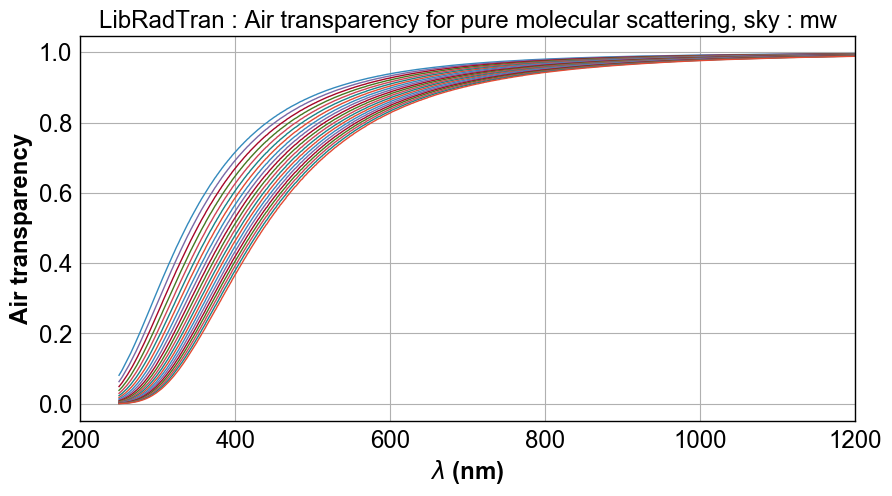

In [27]:
for filename in filelist_afglmw:
    fullpath=os.path.join(rootpath_mw,filename)
    data = np.loadtxt(fullpath)
    x=data[:,0]
    y=data[:,1]
    plt.plot(x,y)
    
plt.xlim(200,1200)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Air transparency')   
plt.title('LibRadTran : Air transparency for pure molecular scattering, sky : mw')

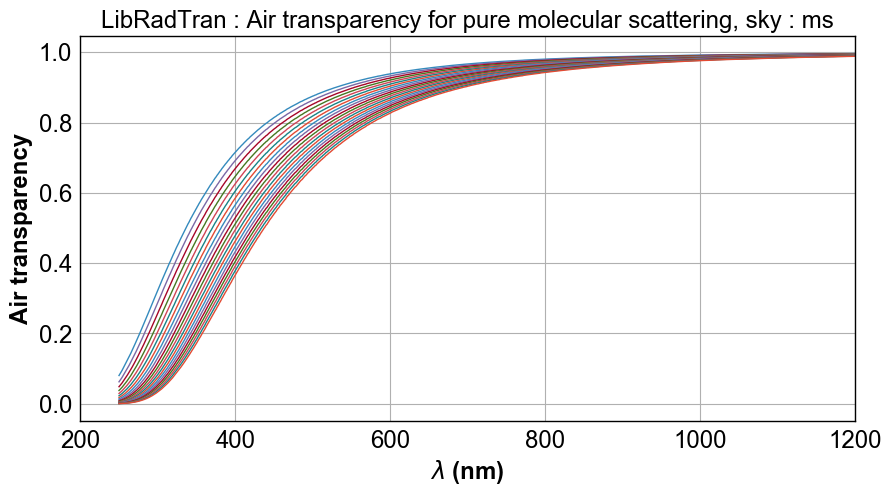

In [28]:
for filename in filelist_afglms:
    fullpath=os.path.join(rootpath_ms,filename)
    data = np.loadtxt(fullpath)
    x=data[:,0]
    y=data[:,1]
    plt.plot(x,y)
    
plt.xlim(200,1200)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Air transparency')   
plt.title('LibRadTran : Air transparency for pure molecular scattering, sky : ms')

### Show the air transparences for sky afglus

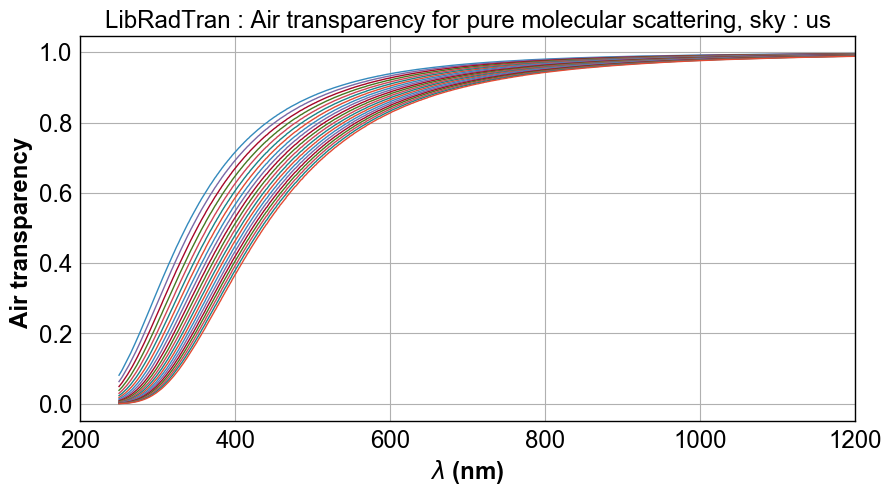

In [31]:
for filename in filelist_afglus:
    fullpath=os.path.join(rootpath_us,filename)
    data = np.loadtxt(fullpath)
    x=data[:,0]
    y=data[:,1]
    plt.plot(x,y)
    
plt.xlim(200,1200)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Air transparency ')   
plt.title('LibRadTran : Air transparency for pure molecular scattering, sky : us')

## Conclusion

Taking the transparencies ratio $\frac{mw}{us}$ and $\frac{ms}{us}$ are the same concerning the molecular scattering except in UV and visible

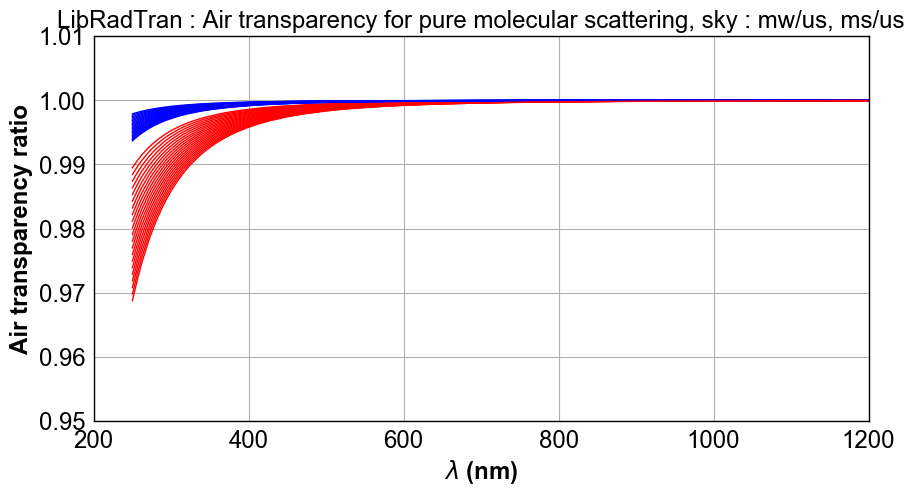

In [30]:
for index,filename1 in np.ndenumerate(filelist_afglus):
    idx=index[0]
    filename2=filelist_afglmw[idx]
    filename3=filelist_afglms[idx]
    fullpath1=os.path.join(rootpath_us,filename1)
    fullpath2=os.path.join(rootpath_mw,filename2)
    fullpath3=os.path.join(rootpath_ms,filename3)
    data1 = np.loadtxt(fullpath1)
    x1=data1[:,0]
    y1=data1[:,1]
    data2 = np.loadtxt(fullpath2)
    x2=data2[:,0]
    y2=data2[:,1]
    data3 = np.loadtxt(fullpath3)
    x3=data3[:,0]
    y3=data3[:,1]
    ratio1=y2/y1
    ratio2=y3/y1
    plt.plot(x1,ratio1,'b')
    plt.plot(x1,ratio2,'r')
plt.xlim(200,1200)
plt.ylim(0.95,1.01)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Air transparency ratio')   
plt.title('LibRadTran : Air transparency for pure molecular scattering, sky : mw/us, ms/us')    